# Solution by Johannes Rieke & Nelson Niemeyer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. McCulloch-Pitts Neuron

In [2]:
def y(w, x):
    return np.sign(np.inner(w, x))

In [3]:
w = np.array([-3, 2, 2])

In [4]:
x1 = 1
x2 = 1
y(w, np.array([1, x1, x2]))

1

In [5]:
x1 = 1
x2 = -1
y(w, np.array([1, x1, x2]))

-1

In [6]:
x1 = -1
x2 = 1
y(w, np.array([1, x1, x2]))

-1

In [7]:
x1 = -1
x2 = -1
y(w, np.array([1, x1, x2]))

-1

The outputs above show that the neuron yields 1 if both inputs are 1 and -1 otherwise. This is an AND operation.

## 2. Activation functions

(-5, 5)

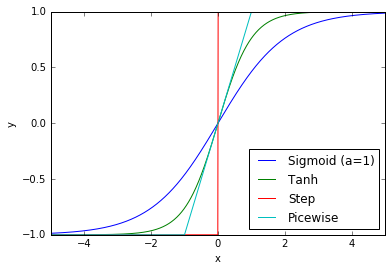

In [8]:
x = np.linspace(-5, 5, 1000)

a = 1
def sigmoid(x, a=1):
    return 2. / (1 + np.exp(-a*x)) - 1
plt.plot(x, sigmoid(x, a), label='Sigmoid (a={})'.format(a))

plt.plot(x, np.tanh(x), label='Tanh')

def step(x):    
    y = np.zeros_like(x)
    y[x >= 0] = 1.
    y[x < 0] = -1
    return y
plt.plot(x, step(x), label='Step')

def picewise(x):    
    y = np.array(x)
    y[x >= 1] = 1.
    y[x <= -1] = -1
    return y
plt.plot(x, picewise(x), label='Picewise')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.xlim(-5, 5)

Interpretation of parameter a: The higher a, the steeper is the sigmoid function.

## 3. Rosenblatt's perceptron

In [9]:
x_train = np.random.normal(size=(1000, 3))
x_train[:, 0] = 1.
x_train

array([[ 1.        ,  0.47298823, -0.45346102],
       [ 1.        , -0.0262628 , -2.19166418],
       [ 1.        ,  0.56182488,  1.05540148],
       ..., 
       [ 1.        , -1.0285313 ,  0.88563189],
       [ 1.        , -1.31811047,  0.62346252],
       [ 1.        , -0.41028856, -1.02849119]])

In [10]:
d_train = np.ones(1000)
d_train[x_train[:, 1] + x_train[:, 2] < 0.5] = -1.
d_train[:10]

array([-1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.])

In [11]:
def y(w, x, activation=np.sign):
    return activation(np.inner(w, x))

def train_perceptron(x, d, learning_rate, epochs, activation=np.sign):
    """Initialize and train the weights of a perceptron with two variable inputs and one bias input. Return the history of weights."""
    w = np.random.rand(3)
    w_hist = []
    for epoch in range(epochs):
        for x_k, d_k in zip(x, d):
            w += learning_rate * (d_k - y(w, x_k, activation)) * x_k
            w_hist.append(np.array(w))
    return w_hist

w_hist = train_perceptron(x_train, d_train, 0.005, 2)
w = w_hist[-1]
w_hist[:10]

[array([ 0.12958205,  0.17681624,  0.4867229 ]),
 array([ 0.12958205,  0.17681624,  0.4867229 ]),
 array([ 0.12958205,  0.17681624,  0.4867229 ]),
 array([ 0.11958205,  0.18253201,  0.48389972]),
 array([ 0.11958205,  0.18253201,  0.48389972]),
 array([ 0.10958205,  0.19394574,  0.4697594 ]),
 array([ 0.10958205,  0.19394574,  0.4697594 ]),
 array([ 0.10958205,  0.19394574,  0.4697594 ]),
 array([ 0.09958205,  0.19949437,  0.46288225]),
 array([ 0.09958205,  0.19949437,  0.46288225])]

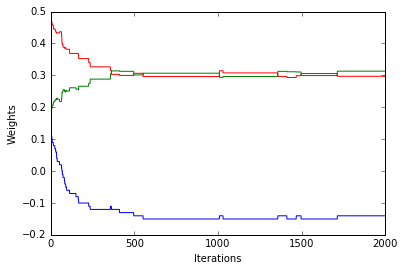

In [12]:
plt.plot(w_hist)
plt.xlabel('Iterations')
plt.ylabel('Weights')

The learning rate was chosen empirically so that the weights settle to steady values with a relatively smooth curve.

In [13]:
x_test = np.random.normal(size=(1000, 3))
x_test[:, 0] = 1.
x_test

array([[ 1.        , -0.3246912 , -1.6827035 ],
       [ 1.        ,  0.92691491, -0.61013767],
       [ 1.        , -0.03025152,  0.69339777],
       ..., 
       [ 1.        , -0.32137251,  1.00501666],
       [ 1.        , -0.12800887,  1.03395356],
       [ 1.        ,  1.06041721, -1.54056994]])

In [14]:
d_test = np.ones(1000)
d_test[x_test[:, 1] + x_test[:, 2] < 0.5] = -1.
d_test[:10]

array([-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.])

In [15]:
def get_accuracy(x, d, w, activation=np.sign):
    predicted_d = y(w, x, activation)
    predicted_d[predicted_d >= 0] = 1.
    predicted_d[predicted_d < 0] = -1.
    return np.mean(predicted_d == d)
print 'Accuracy on test set:', get_accuracy(x_test, d_test, w)

Accuracy on test set: 0.99


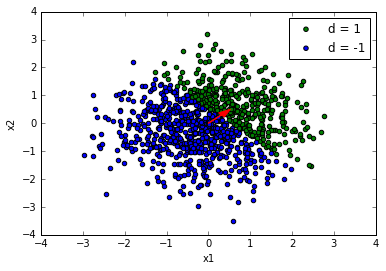

In [16]:
plt.scatter(x_train[:, 1][d_train == 1], x_train[:, 2][d_train == 1], c='g', label='d = 1')
plt.scatter(x_train[:, 1][d_train == -1], x_train[:, 2][d_train == -1], c='b', label='d = -1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(scatterpoints=1)

plt.arrow(0, 0, w[1], w[2], color='r', width=0.01)

The decision boundary of the perceptron is orthogonal to the weight vector (because $w^T x = 0$ separates between the two possible outputs). Therefore, the weight vector is "optimal" because it is approximately orthogonal to the boundary between the samples with positive and negative response - thus, the perceptron can separate between these two classes.

In [17]:
for activation in (np.sign, sigmoid, np.tanh, step, picewise):    
    w_hist = train_perceptron(x_train, d_train, 0.005, 10, activation)
    acc = get_accuracy(x_test, d_test, w_hist[-1], activation)
    print "Accuracy with {}: {}".format(activation.__name__, acc)

Accuracy with sign: 0.999
Accuracy with sigmoid: 0.991
Accuracy with tanh: 0.991
Accuracy with step: 0.994
Accuracy with picewise: 0.991


Of course, this is not a valid comparison because the hyperparameters and the learning process were not fine-tuned for each activation function.

## 4. Linear seperability

In [18]:
x_xor = np.array([[1., 0., 0.], [1., 0., 1.], [1., 1., 0.], [1., 1., 1.]])
d_xor = np.array([0., 1., 1., 0.])
zip(x_xor, d_xor)

[(array([ 1.,  0.,  0.]), 0.0),
 (array([ 1.,  0.,  1.]), 1.0),
 (array([ 1.,  1.,  0.]), 1.0),
 (array([ 1.,  1.,  1.]), 0.0)]

In [19]:
w_hist = train_perceptron(x_xor, d_xor, 0.01, 100)
w_hist[:10]

[array([ 0.81038977,  0.8405547 ,  0.99632609]),
 array([ 0.81038977,  0.8405547 ,  0.99632609]),
 array([ 0.81038977,  0.8405547 ,  0.99632609]),
 array([ 0.80038977,  0.8305547 ,  0.98632609]),
 array([ 0.79038977,  0.8305547 ,  0.98632609]),
 array([ 0.79038977,  0.8305547 ,  0.98632609]),
 array([ 0.79038977,  0.8305547 ,  0.98632609]),
 array([ 0.78038977,  0.8205547 ,  0.97632609]),
 array([ 0.77038977,  0.8205547 ,  0.97632609]),
 array([ 0.77038977,  0.8205547 ,  0.97632609])]

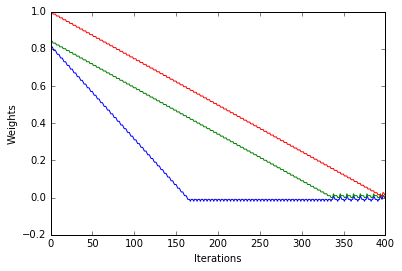

In [20]:
plt.plot(w_hist)
plt.xlabel('Iterations')
plt.ylabel('Weights')

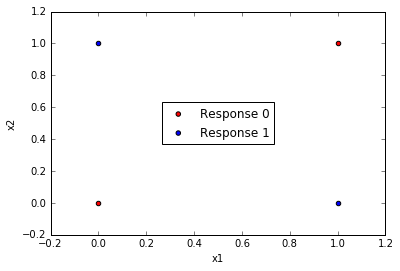

In [21]:
plt.scatter(x_xor[:, 1][d_xor == 0], x_xor[:, 2][d_xor == 0], c='r', label='Response 0')
plt.scatter(x_xor[:, 1][d_xor == 1], x_xor[:, 2][d_xor == 1], c='b', label='Response 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='center', scatterpoints=1)

As can be seen in the plot, XOR is not linearly separable: There is no possible linear decision boundary which separates the inputs with response 0 from the inputs with response 1.